In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [14]:

# Load the first dataset
df1 = pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')

# Load the second dataset
df2 = pd.read_csv('/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv')

# Merge the two datasets using the concat function
df_merged = pd.concat([df1, df2], ignore_index=True)

# Print the merged dataset
print(df_merged)

              Region         Date  Frequency  \
0     Andhra Pradesh   31-05-2019    Monthly   
1     Andhra Pradesh   30-06-2019    Monthly   
2     Andhra Pradesh   31-07-2019    Monthly   
3     Andhra Pradesh   31-08-2019    Monthly   
4     Andhra Pradesh   30-09-2019    Monthly   
...              ...          ...        ...   
1016     West Bengal   30-06-2020          M   
1017     West Bengal   31-07-2020          M   
1018     West Bengal   31-08-2020          M   
1019     West Bengal   30-09-2020          M   
1020     West Bengal   31-10-2020          M   

       Estimated Unemployment Rate (%)   Estimated Employed  \
0                                 3.65           11999139.0   
1                                 3.05           11755881.0   
2                                 3.75           12086707.0   
3                                 3.32           12285693.0   
4                                 5.17           12256762.0   
...                                ...       

Columns in df1: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in df2: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


<Axes: xlabel='None', ylabel=' Estimated Unemployment Rate (%)'>

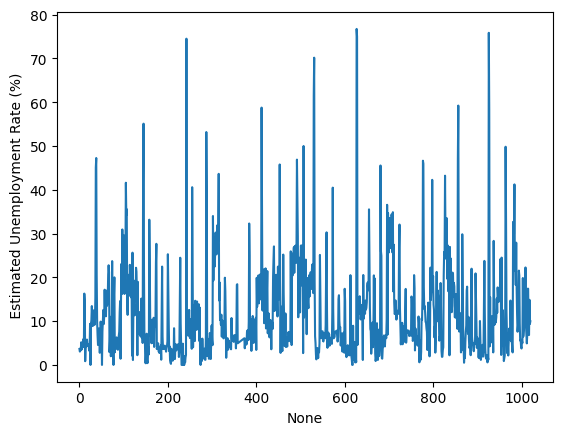

In [19]:
# Check if 'unemployment_rate' exists in both DataFrames before merging
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Determine the correct column name for unemployment rate
# Assuming the column name is ' Estimated Unemployment Rate (%)' in df1 and 'Unemployment Rate' in df2
y_column = ' Estimated Unemployment Rate (%)' if ' Estimated Unemployment Rate (%)' in df_merged.columns else 'Unemployment Rate'

# Use the correct column name in the plotting code
sns.lineplot(data=df_merged, x=df_merged.index, y=y_column)

In [39]:
# Perform linear regression to model unemployment rate over time
X = df_merged.index.year.dropna().values.reshape(-1, 1)  # Drop NaN values from the index
y = df_merged[y_column].dropna().values  # Drop NaN values from unemployment rate

# Create and fit linear regression model
model = sm.OLS(y, X).fit()

# Print summary of linear regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.552
Model:                            OLS   Adj. R-squared (uncentered):              0.551
Method:                 Least Squares   F-statistic:                              1238.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):                   1.84e-177
Time:                        17:17:43   Log-Likelihood:                         -3818.9
No. Observations:                1007   AIC:                                      7640.
Df Residuals:                    1006   BIC:                                      7645.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------